In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib


In [2]:
df = pd.read_csv(r"D:\Studies\DataScience\DataTrained\DataTrained_Classes\FlipRobo\FlipRobo2\ProjectEvaluation\Phase3\census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Renaming Columns name
df.rename(columns={'age':'Age','workclass':'Workclass','fnlwgt':'Final_weight','education':'Education','education.num':'Education_num','marital.status':'Marital_status','occupation':'Occupation','relationship':'Relationship','race':'Race','sex':'Sex','capital.gain':'Capital_gain','capital.loss':'Capital_loss','hours.per.week':'Hours_per_week','native.country':'Native_country','income':'Income'}, inplace=True)


In [5]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# Income Column seems like not in manageble formate , replacing income value >=50K to 1 and <50K to 0.
df['Income'] =df['Income'].str.strip()
df['Income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [7]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 32560 rows and 15 columns respectively present in the dataset.


In [8]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


In [9]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 24 duplicates present in the dataset


In [10]:
#Dropping Duplocate values
df.drop_duplicates(inplace=True)

In [11]:
#Checking Duplicates
df.duplicated().sum()

0

In [12]:
# checking null values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 0 Nulls present in the dataset


<Axes: >

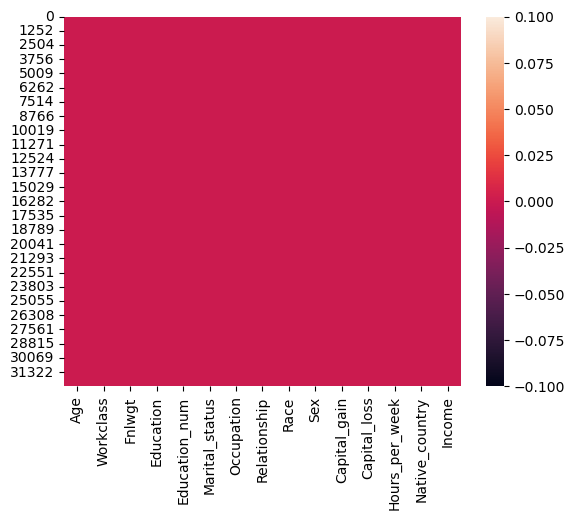

In [13]:
# Heatmap of null values
sns.heatmap(df.isnull())

Observation:

There are no Null Values are present in dataset

In [14]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [15]:
# checking number of unique values in each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [16]:
# Checking Value counts
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
**************************************************
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
**************************************************
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
**************************************************
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th         

In [17]:
def find_features_with_missing_values(data):
    # Replace characters with NaN
    replace_chars = ["\n", "\n?\n", "?","\n?"," ?","? "," ? "," ?\n"]
    if any(char in data.values for char in replace_chars):
        data.replace(replace_chars, np.nan, inplace=True)
        print("Successfully replaced characters with NaN.")
    
    # Find features with missing values
    features_with_null = [feature for feature in data.columns if data[feature].isnull().sum() > 0]
    if not features_with_null:
        print("No missing values found in any features.")
    else:
        for feature in features_with_null:
            print(f"{feature}: {round(data[feature].isnull().mean() * 100, 2)}%")
    return features_with_null

In [18]:
find_features_with_missing_values(df)

Successfully replaced characters with NaN.
Workclass: 5.64%
Occupation: 5.66%
Native_country: 1.79%


['Workclass', 'Occupation', 'Native_country']

In [19]:
# Missing Values
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [20]:
find_features_with_missing_values(df)

No missing values found in any features.


[]

In [21]:
# Clean up occupation column by removing any leading/trailing spaces
df['Occupation'] = df['Occupation'].str.strip()
# Replace occupation categories with new categories
df['New_occupation'] = df['Occupation'].replace({
    'Prof-specialty': 'Professional_Managerial',
    'Craft-repair': 'Skilled_Technical',
    'Exec-managerial': 'Professional_Managerial',
    'Adm-clerical': 'Sales_Administrative',
    'Sales': 'Sales_Administrative',
    'Other-service': 'Service_Care',
    'Machine-op-inspct': 'Skilled_Technical',
    'Missing': 'Unclassified Occupations',
    'Transport-moving': 'Skilled_Technical',
    'Handlers-cleaners': 'Service_Care',
    'Farming-fishing': 'Service_Care',
    'Tech-support': 'Skilled_Technical',
    'Protective-serv': 'Professional_Managerial',
    'Priv-house-serv': 'Service_Care',
    'Armed-Forces': 'Unclassified Occupations',
})

# Check value counts of new occupation column
df.drop(['Occupation'], axis=1,inplace=True)
print(f"New narrowed categories : \n{df['New_occupation'].value_counts()}")

New narrowed categories : 
Professional_Managerial     10693
Skilled_Technical            8618
Sales_Administrative         7417
Service_Care                 5799
Unclassified Occupations        9
Name: New_occupation, dtype: int64


In [22]:
# Statistical Understanding
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343,0.240933
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079,0.427656
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [23]:
#droping Education Columns because We have Education Number
df.drop(['Education'], axis=1,inplace=True)

In [24]:
#Checking Skewness
skewness = df.skew()
skewness

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Income             1.211640
dtype: float64

In [25]:
#Saperating Categorical And Numerical Columns
Categorical = []
Numerical = []
for i in df.columns:
    if df[i].dtypes == "O":
        Categorical.append(i)
    else:
        Numerical.append(i)

In [26]:
Categorical

['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

In [27]:
Numerical

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Income']

Visualizing

In [28]:
df['Workclass'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

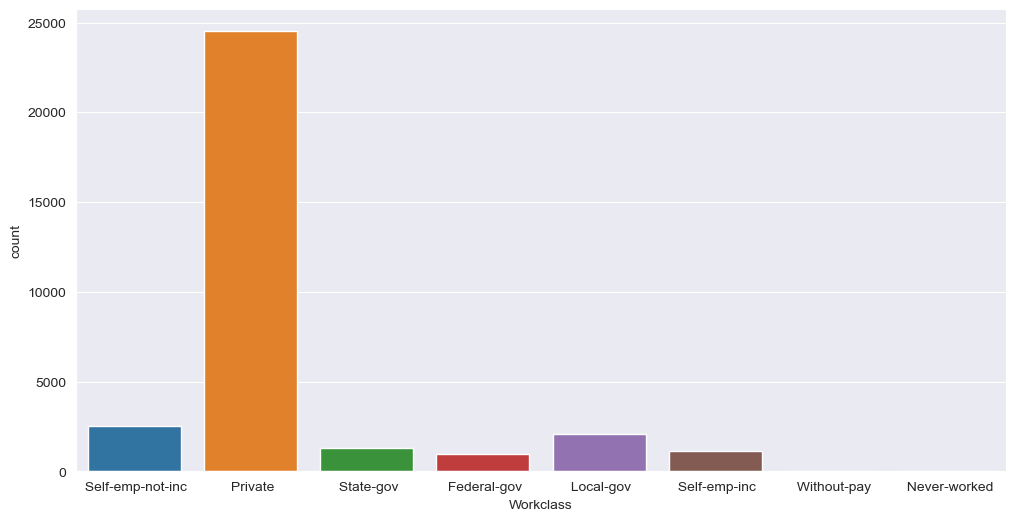

In [29]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.countplot(x='Workclass', data=df)
plt.show()

In [30]:
df.groupby('Workclass')['Income'].value_counts()

Workclass          Income
 Federal-gov       0           589
                   1           371
 Local-gov         0          1476
                   1           617
 Never-worked      0             7
 Private           0         19357
                   1          5152
 Self-emp-inc      1           622
                   0           494
 Self-emp-not-inc  0          1816
                   1           724
 State-gov         0           944
                   1           353
 Without-pay       0            14
Name: Income, dtype: int64

In [31]:
df.groupby('Workclass')['Sex'].value_counts()

Workclass          Sex    
 Federal-gov        Male        645
                    Female      315
 Local-gov          Male       1258
                    Female      835
 Never-worked       Male          5
                    Female        2
 Private            Male      15927
                    Female     8582
 Self-emp-inc       Male        981
                    Female      135
 Self-emp-not-inc   Male       2141
                    Female      399
 State-gov          Male        808
                    Female      489
 Without-pay        Male          9
                    Female        5
Name: Sex, dtype: int64

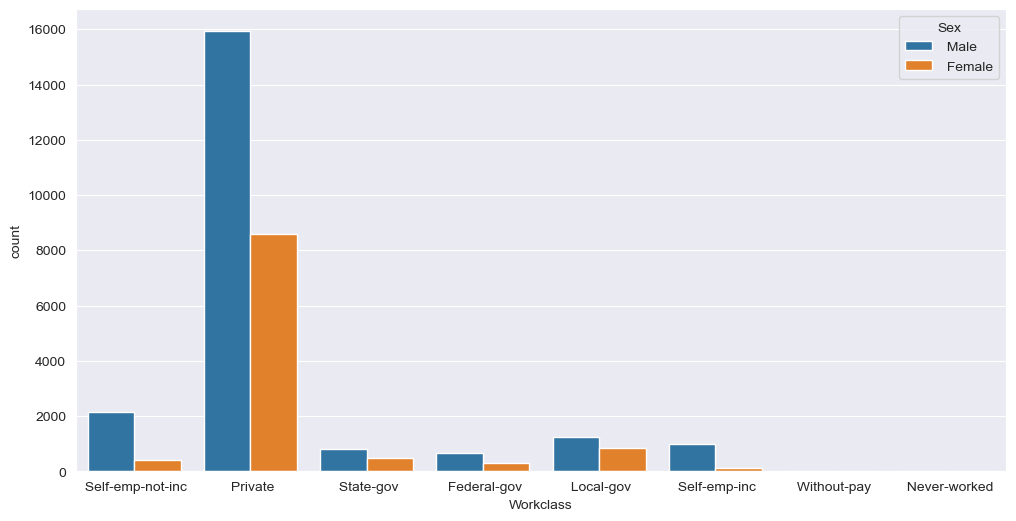

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Workclass',hue='Sex',data=df)
plt.show()


In [33]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

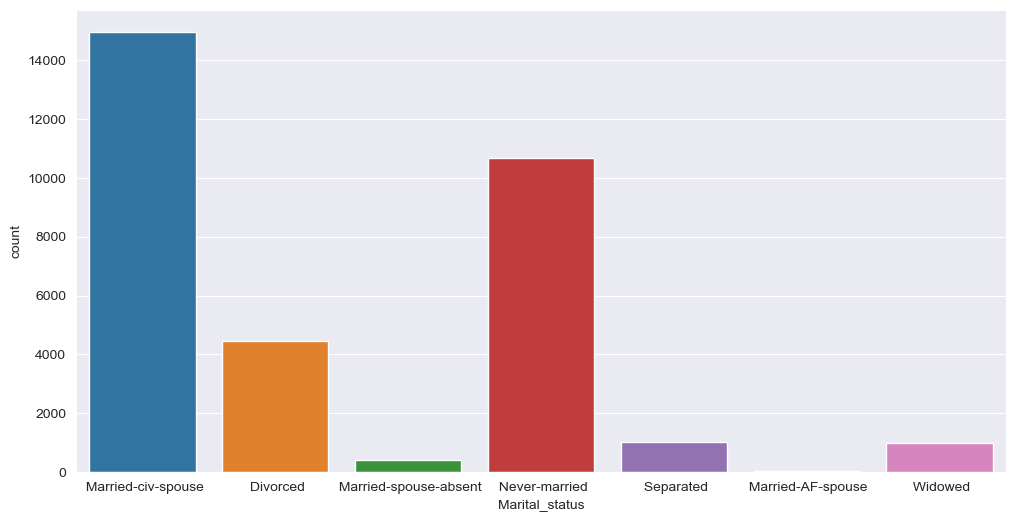

In [34]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.countplot(x='Marital_status', data=df)
plt.show()

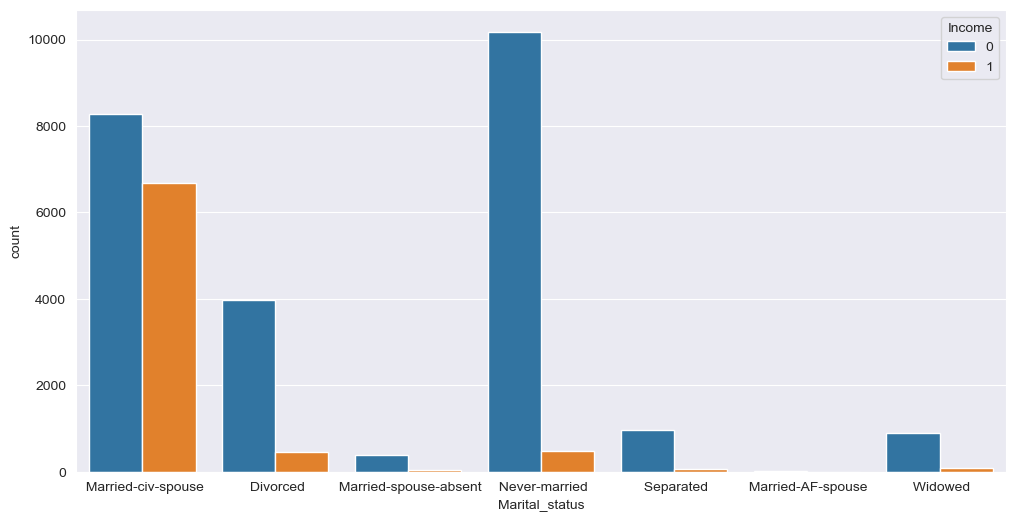

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.show()

In [36]:
df.groupby('Marital_status')['Income'].value_counts()

Marital_status          Income
 Divorced               0          3978
                        1           463
 Married-AF-spouse      0            13
                        1            10
 Married-civ-spouse     0          8280
                        1          6690
 Married-spouse-absent  0           384
                        1            34
 Never-married          0         10175
                        1           491
 Separated              0           959
                        1            66
 Widowed                0           908
                        1            85
Name: Income, dtype: int64

In [37]:
df['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

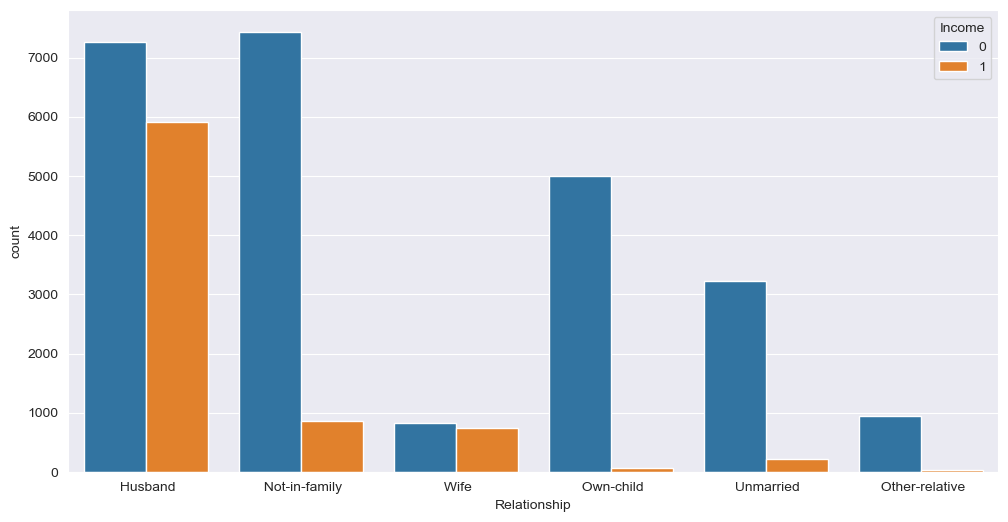

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.show()

In [39]:
df.groupby('Relationship')['Income'].value_counts()

Relationship     Income
 Husband         0         7271
                 1         5916
 Not-in-family   0         7435
                 1          856
 Other-relative  0          944
                 1           37
 Own-child       0         4997
                 1           67
 Unmarried       0         3227
                 1          218
 Wife            0          823
                 1          745
Name: Income, dtype: int64

In [40]:
df['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [41]:
df.groupby('Race')['Income'].value_counts()

Race                 Income
 Amer-Indian-Eskimo  0           275
                     1            36
 Asian-Pac-Islander  0           762
                     1           276
 Black               0          2735
                     1           387
 Other               0           246
                     1            25
 White               0         20679
                     1          7115
Name: Income, dtype: int64

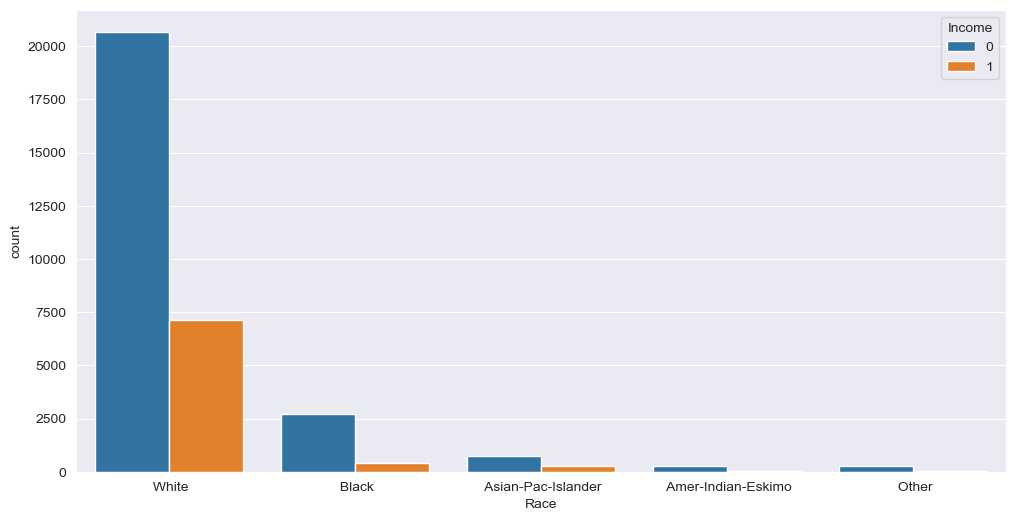

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Race',hue='Income',data=df)
plt.show()

In [43]:
df['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

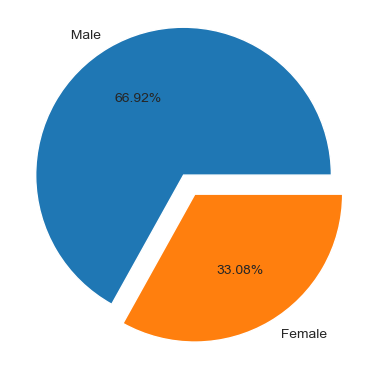

In [44]:
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));

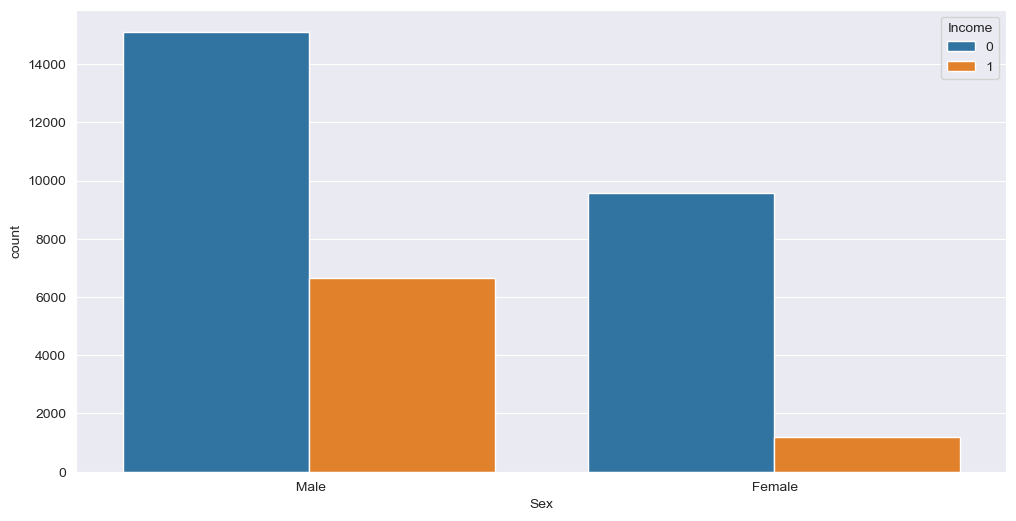

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex',hue='Income',data=df)
plt.show()

In [46]:
df.groupby('Sex')['Income'].value_counts()

Sex      Income
 Female  0          9583
         1          1179
 Male    0         15114
         1          6660
Name: Income, dtype: int64

In [47]:
df['Native_country'].value_counts()

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

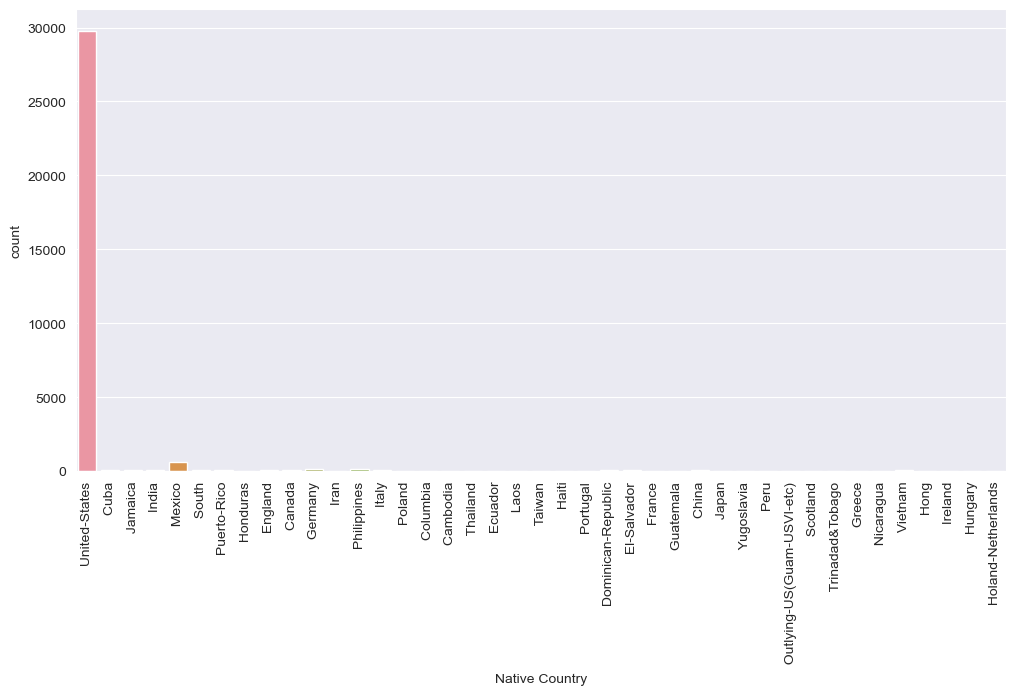

In [48]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.countplot(x='Native_country', data=df)
plt.xticks(rotation=90)
plt.xlabel("Native Country")
plt.show()

In [49]:
Categorical

['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

In [50]:
df['New_occupation'].value_counts()

Professional_Managerial     10693
Skilled_Technical            8618
Sales_Administrative         7417
Service_Care                 5799
Unclassified Occupations        9
Name: New_occupation, dtype: int64

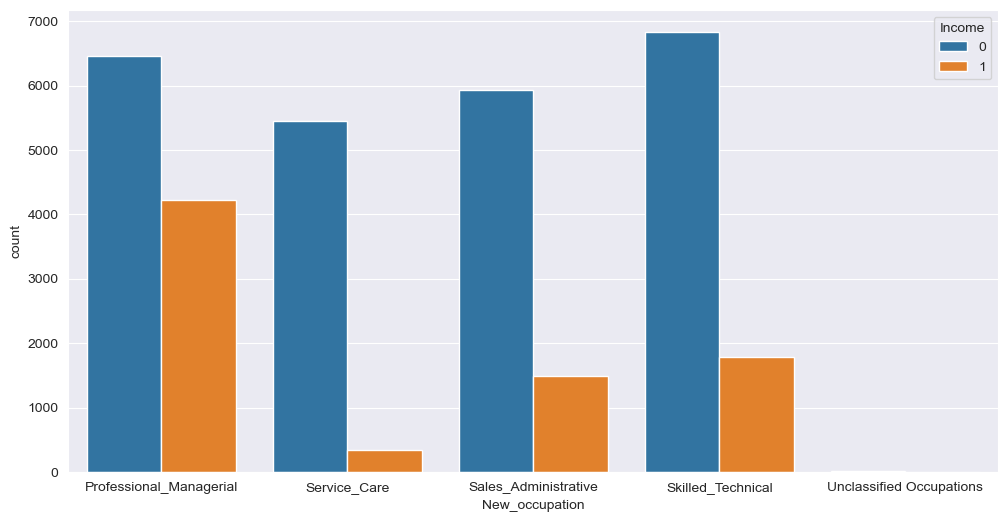

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='New_occupation',hue='Income',data=df)
plt.show()

In [52]:
df.groupby('New_occupation')['Income'].value_counts()

New_occupation            Income
Professional_Managerial   0         6465
                          1         4228
Sales_Administrative      0         5927
                          1         1490
Service_Care              0         5460
                          1          339
Skilled_Technical         0         6837
                          1         1781
Unclassified Occupations  0            8
                          1            1
Name: Income, dtype: int64

In [53]:
df['Age'].value_counts()

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

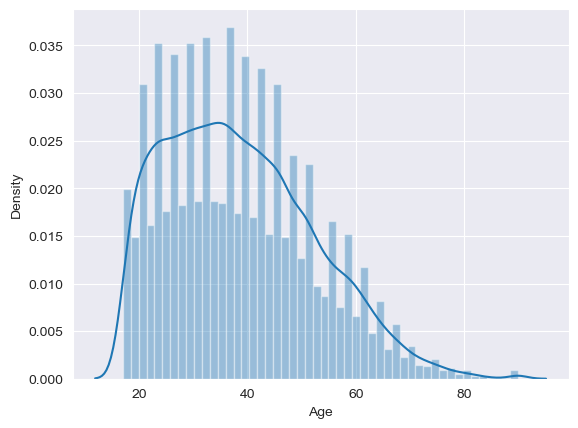

In [54]:
sns.distplot(df['Age'])

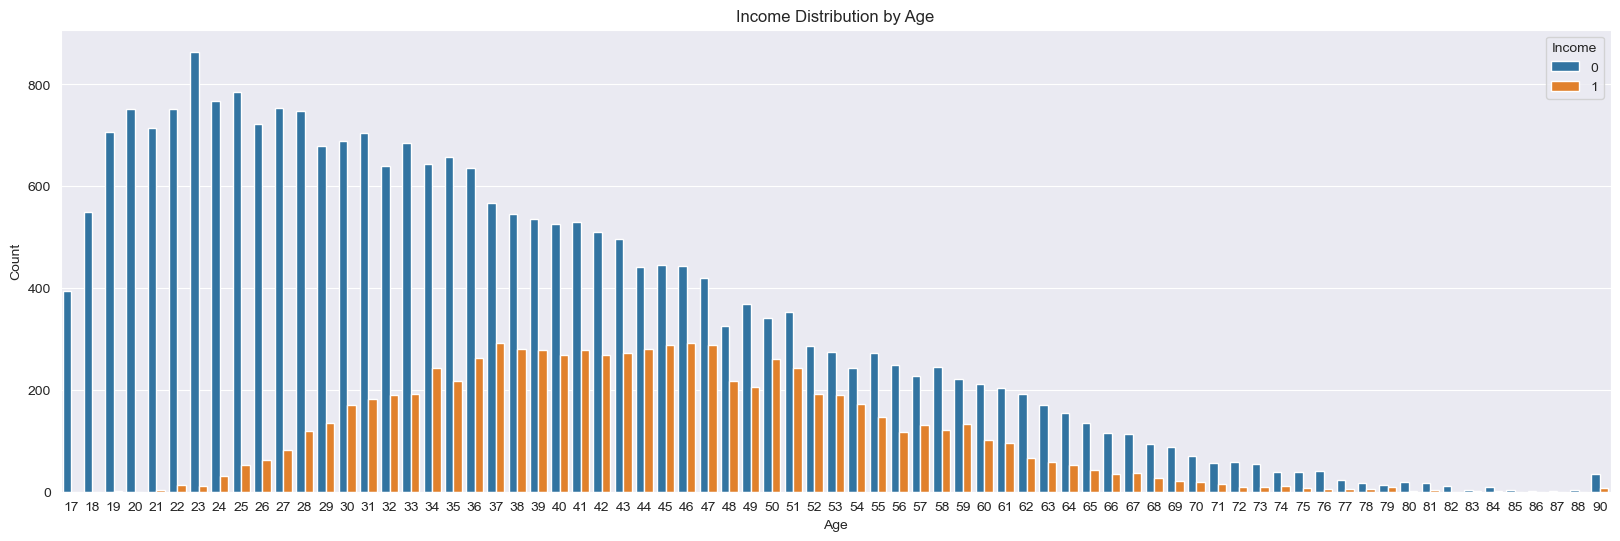

In [55]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', hue='Income', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Income Distribution by Age')
plt.show()

In [56]:
# just to cross check column names as getting error in few column name 
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income', 'New_occupation'],
      dtype='object')

In [57]:
df['Fnlwgt'].nunique()

21647

<Axes: xlabel='Fnlwgt', ylabel='Density'>

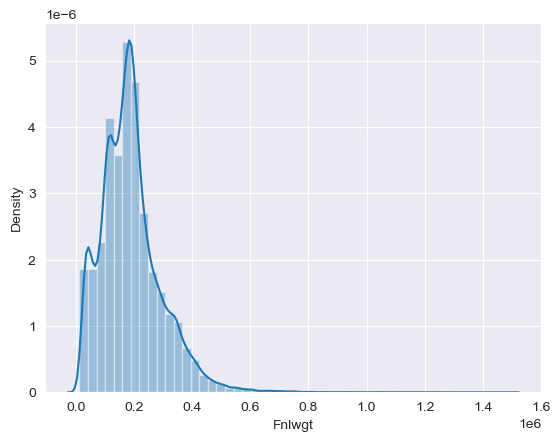

In [58]:
sns.distplot(df['Fnlwgt'])

Oservations 

It is right skewed

In [59]:
df['Education_num'].value_counts()

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

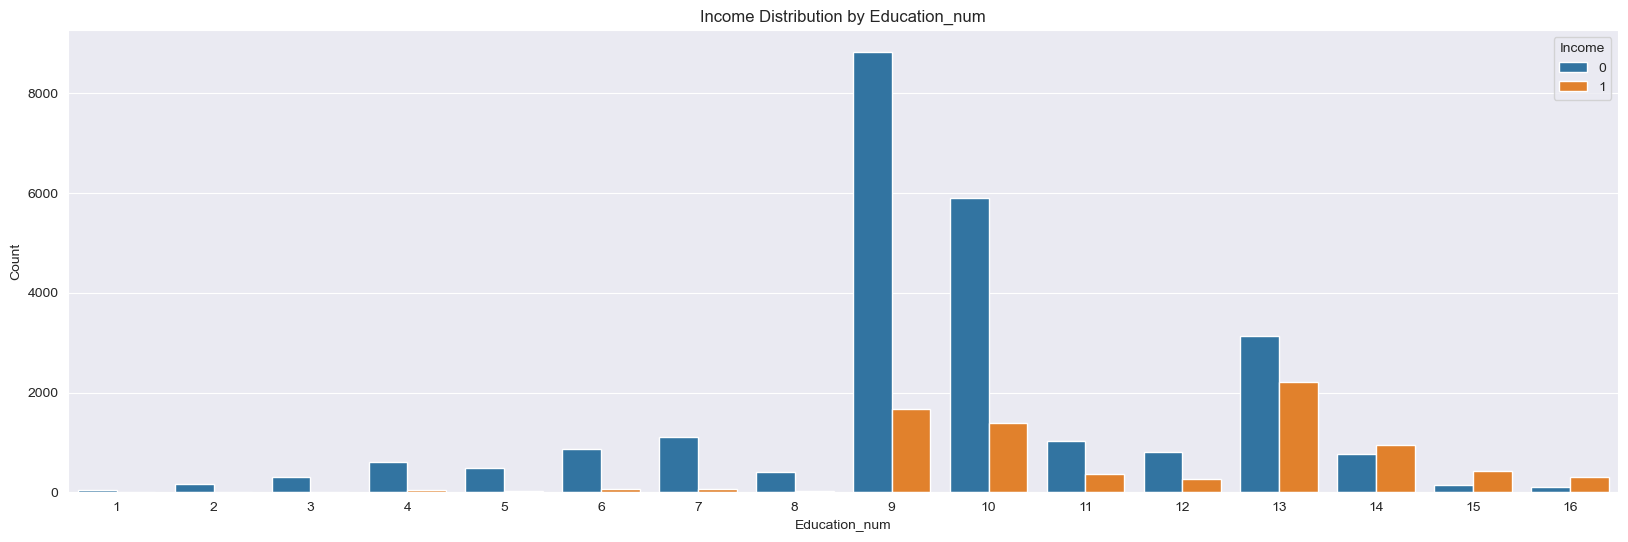

In [60]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Education_num', hue='Income', data=df)
plt.xlabel('Education_num')
plt.ylabel('Count')
plt.title('Income Distribution by Education_num')
plt.show()

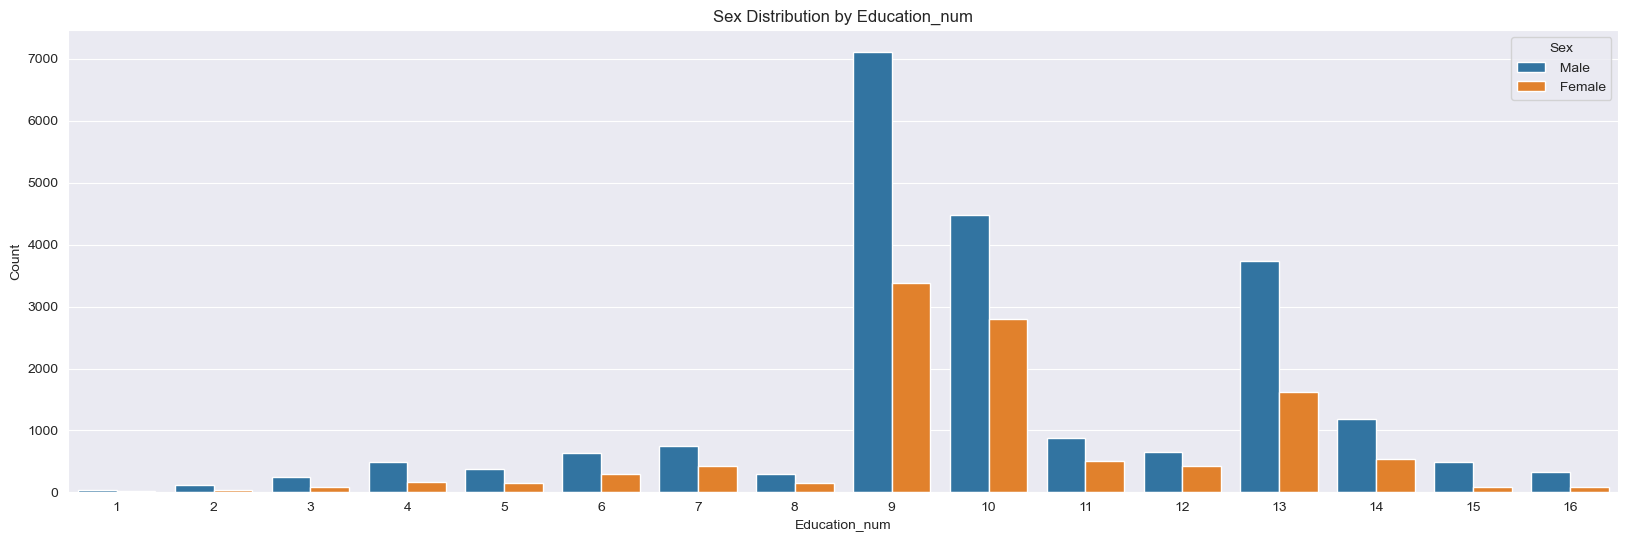

In [61]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Education_num', hue='Sex', data=df)
plt.xlabel('Education_num')
plt.ylabel('Count')
plt.title('Sex Distribution by Education_num')
plt.show()

In [62]:
df['Capital_gain'].nunique()

119

<Axes: xlabel='Capital_gain', ylabel='Density'>

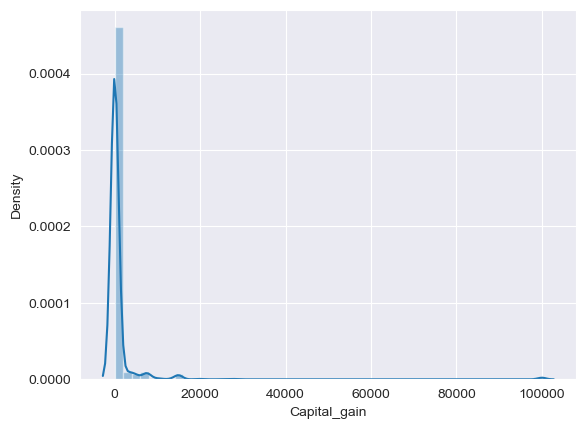

In [63]:
sns.distplot(df['Capital_gain'])

In [64]:
df['Capital_loss'].nunique()

92

<Axes: xlabel='Capital_loss', ylabel='Density'>

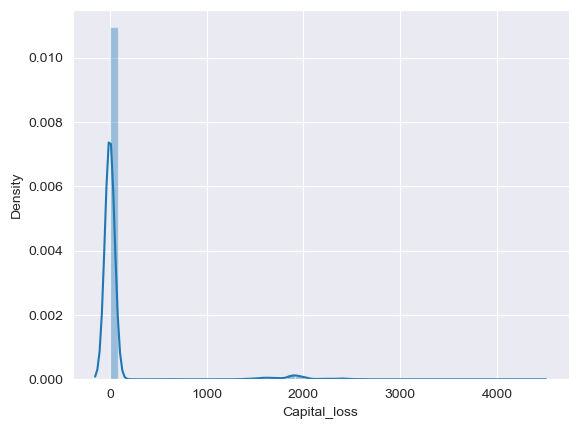

In [65]:
sns.distplot(df['Capital_loss'])

In [66]:
df['Hours_per_week'].nunique()

94

<Axes: xlabel='Hours_per_week', ylabel='Density'>

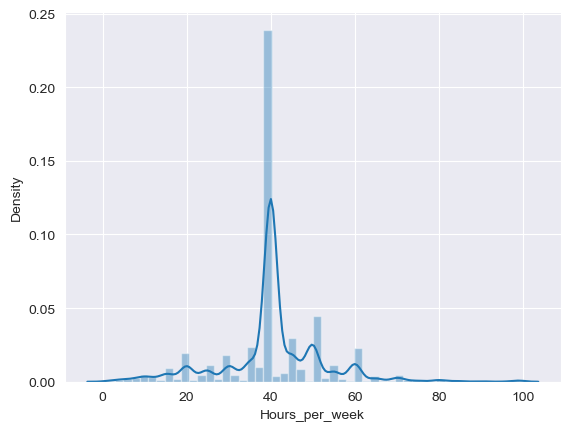

In [67]:
sns.distplot(df['Hours_per_week'])

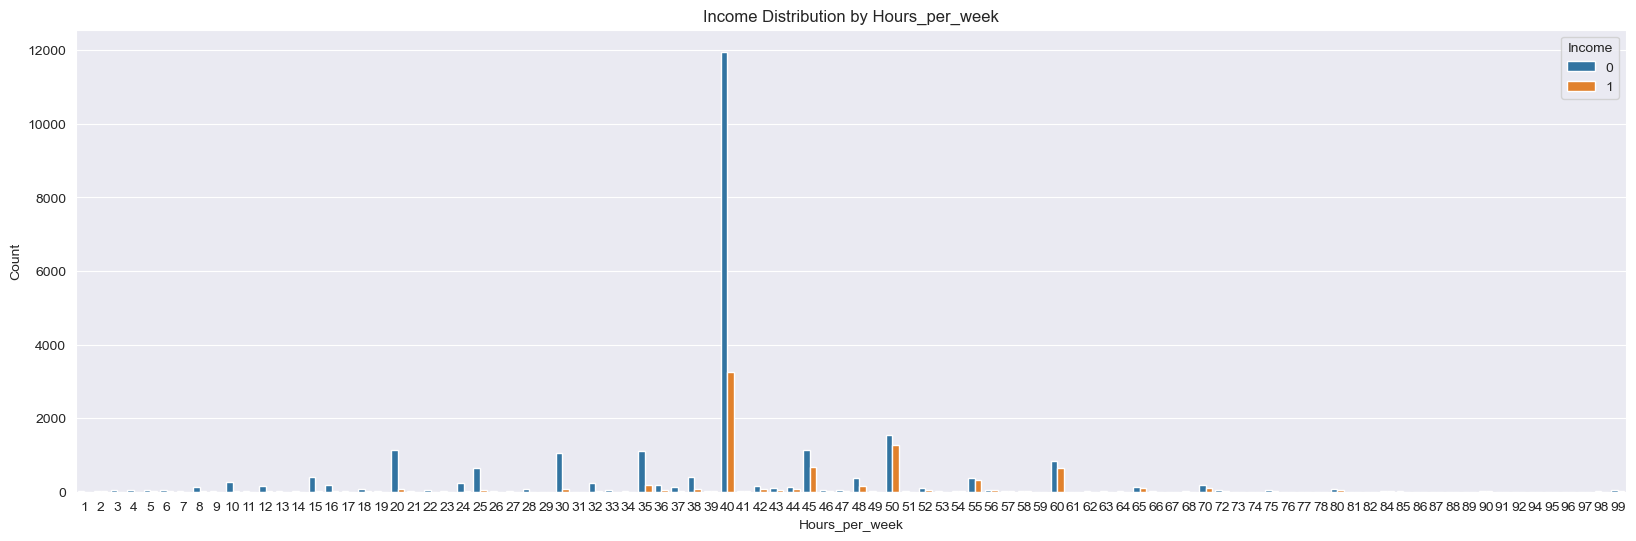

In [68]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Hours_per_week', hue='Income', data=df)
plt.xlabel('Hours_per_week')
plt.ylabel('Count')
plt.title('Income Distribution by Hours_per_week')
plt.show()

In [69]:
df['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

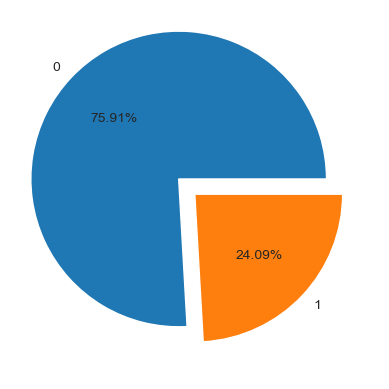

In [70]:
plt.pie(df['Income'].value_counts().values,labels=df['Income'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));

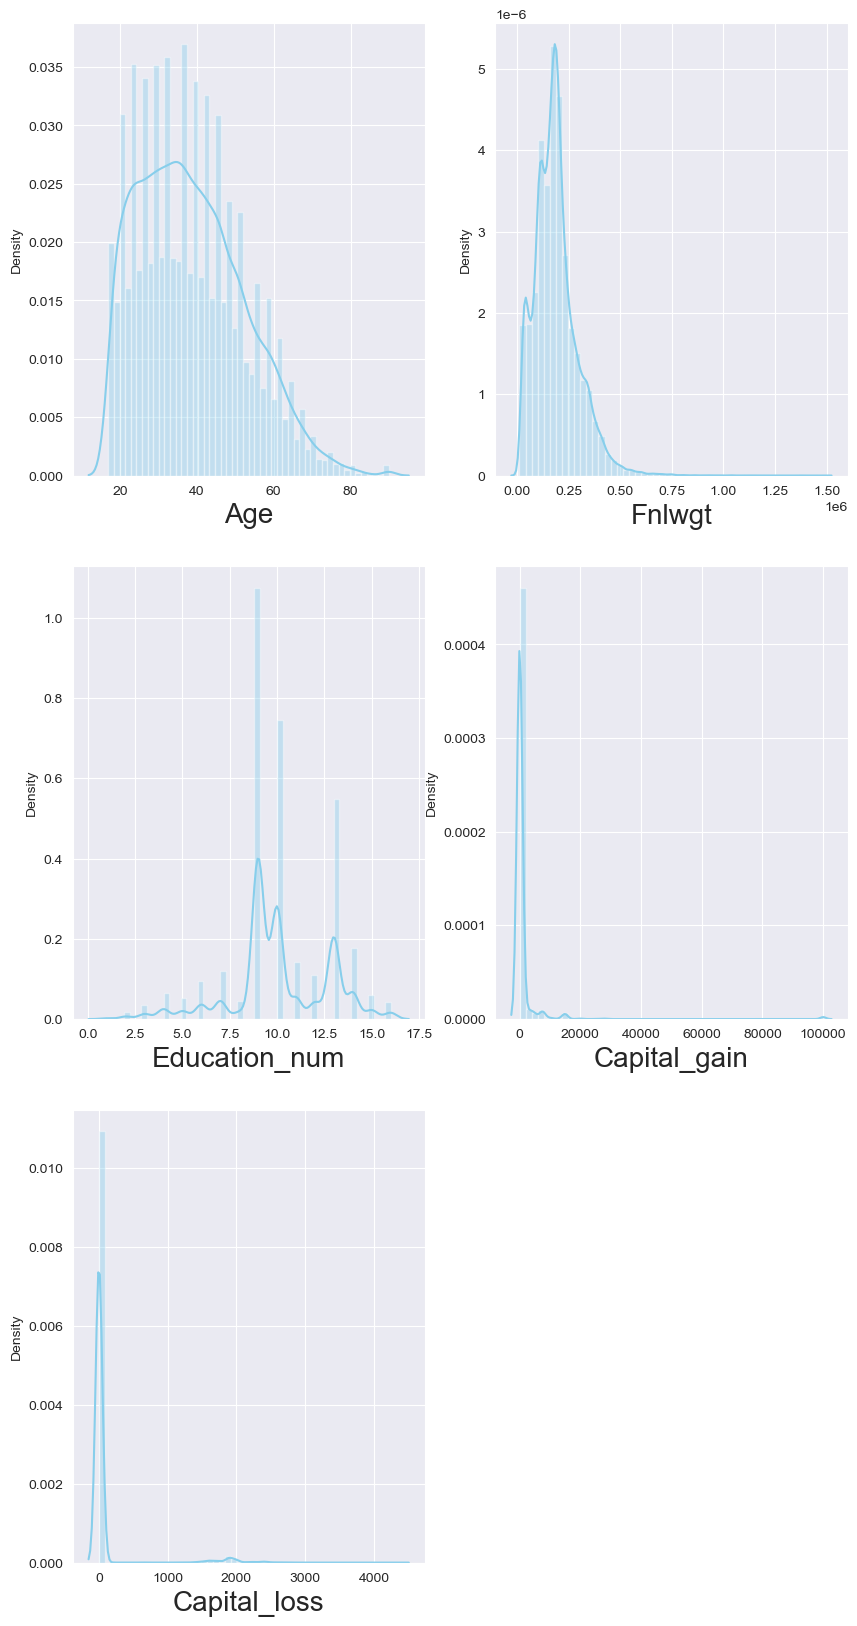

In [71]:
# checking Data Distribution
plt.figure(figsize = (10,20), facecolor = 'white')
plotnumber = 1

for column in Numerical:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

In [72]:
Categorical

['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

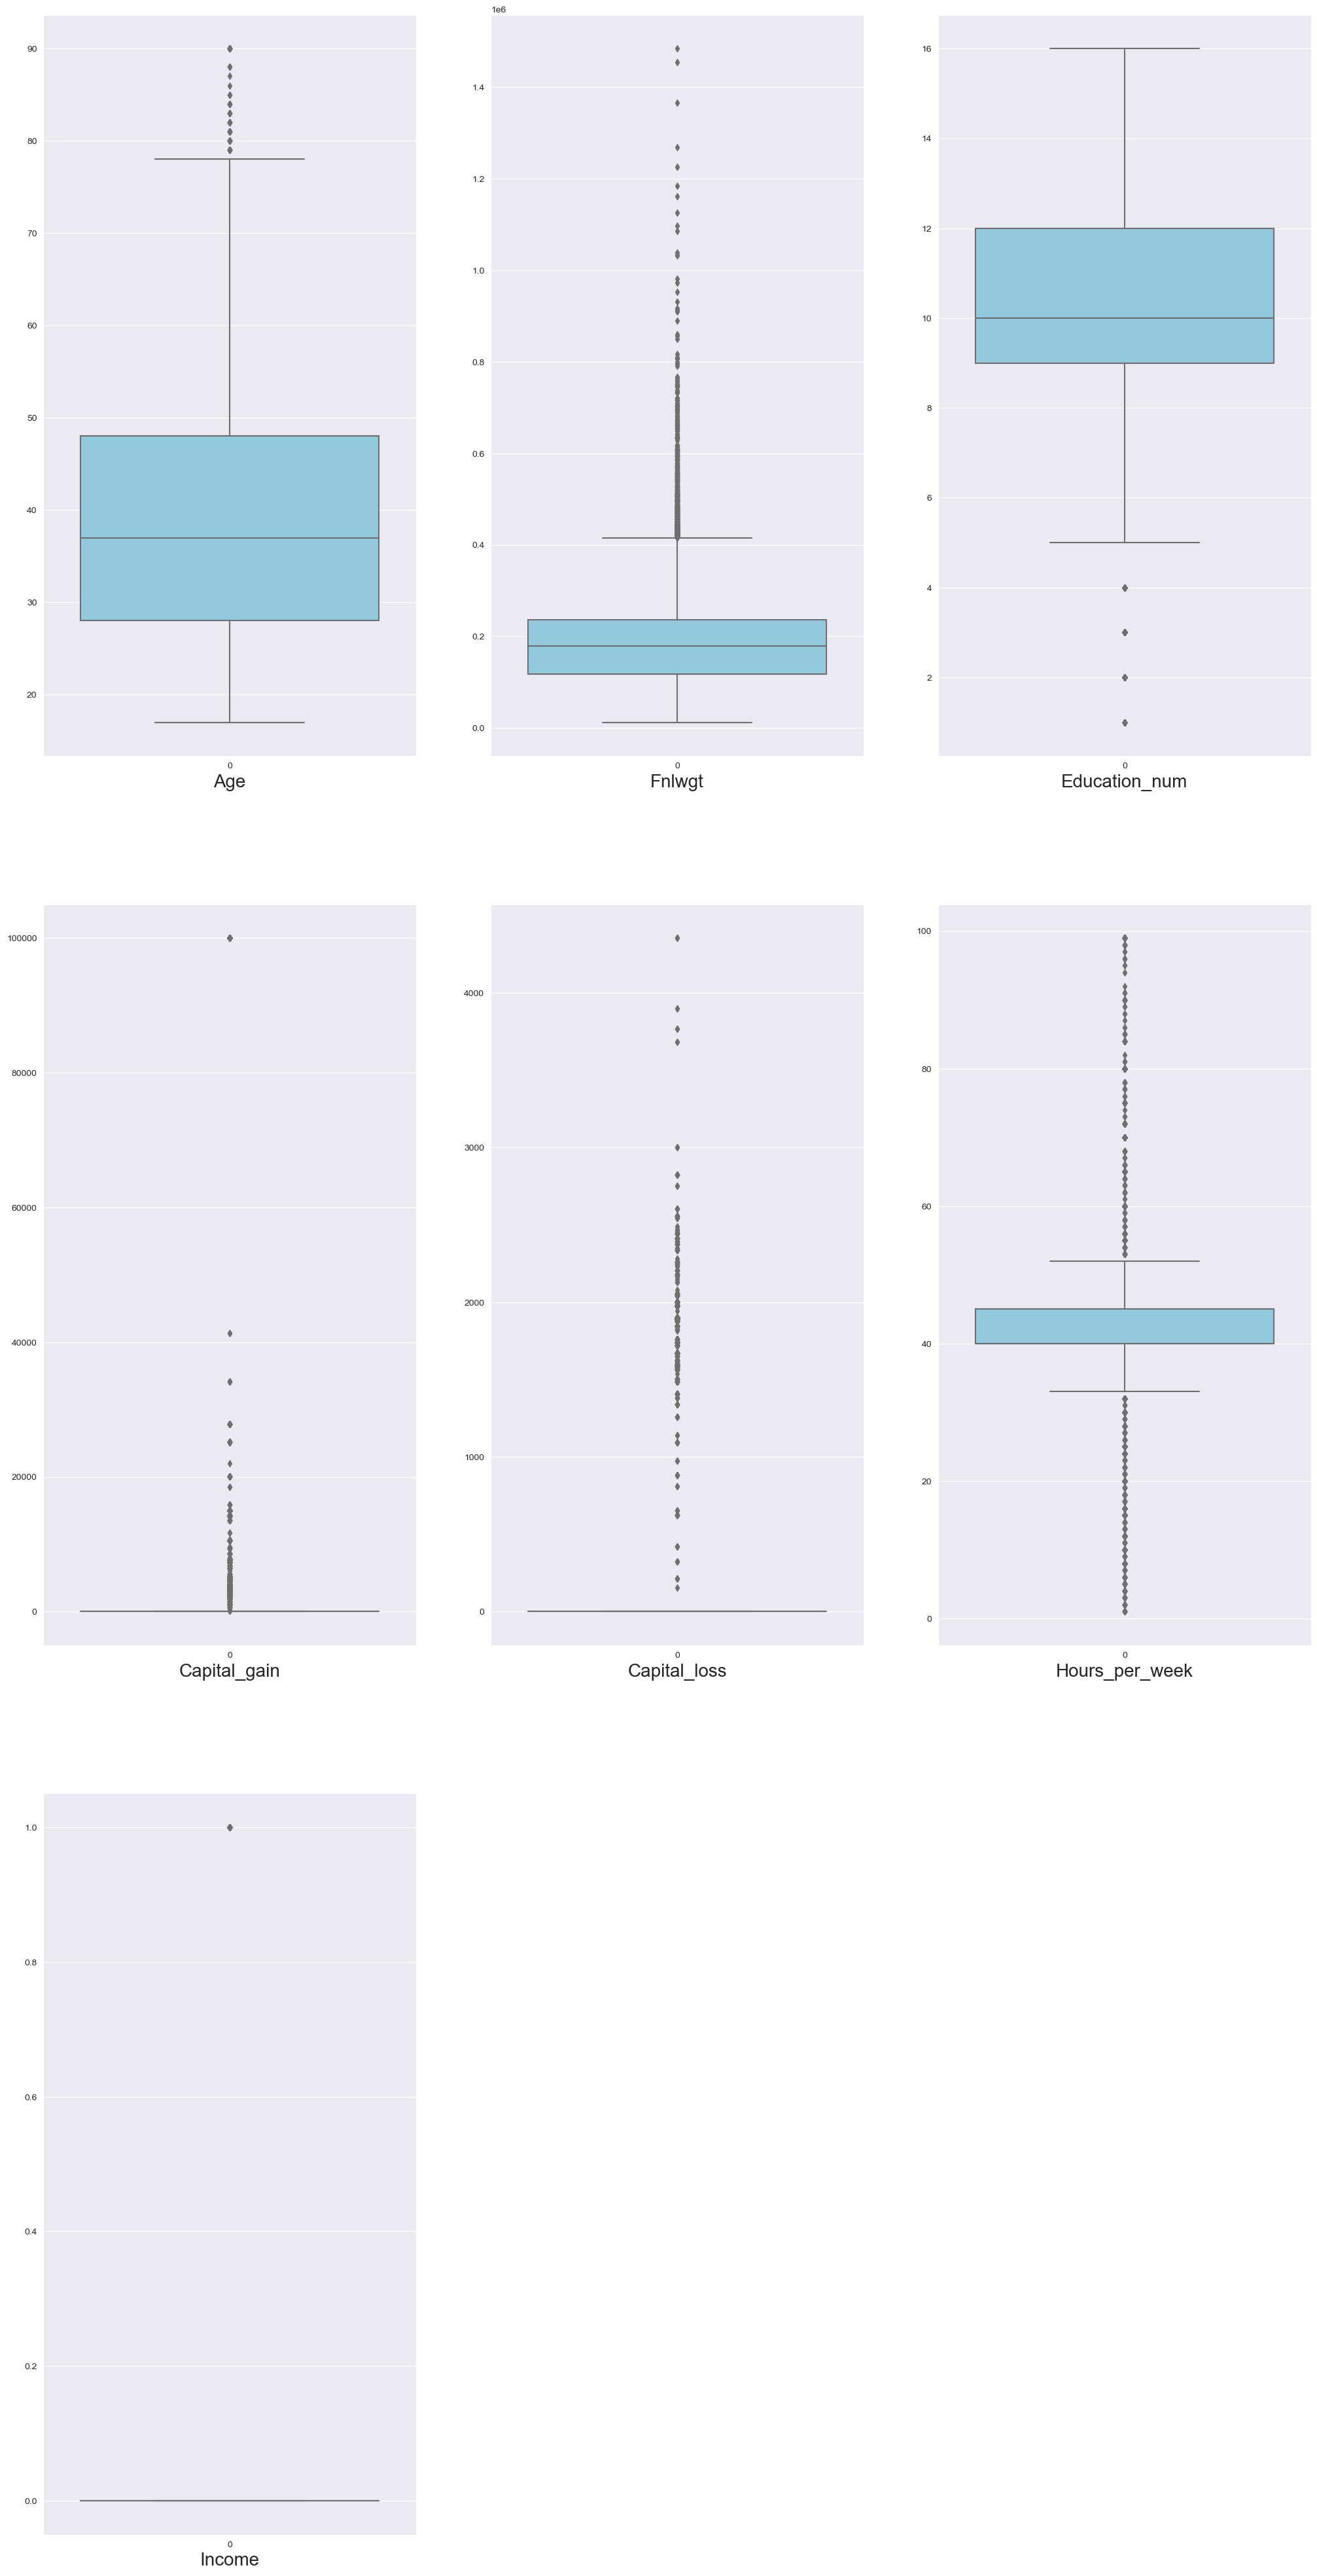

In [73]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in Numerical:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

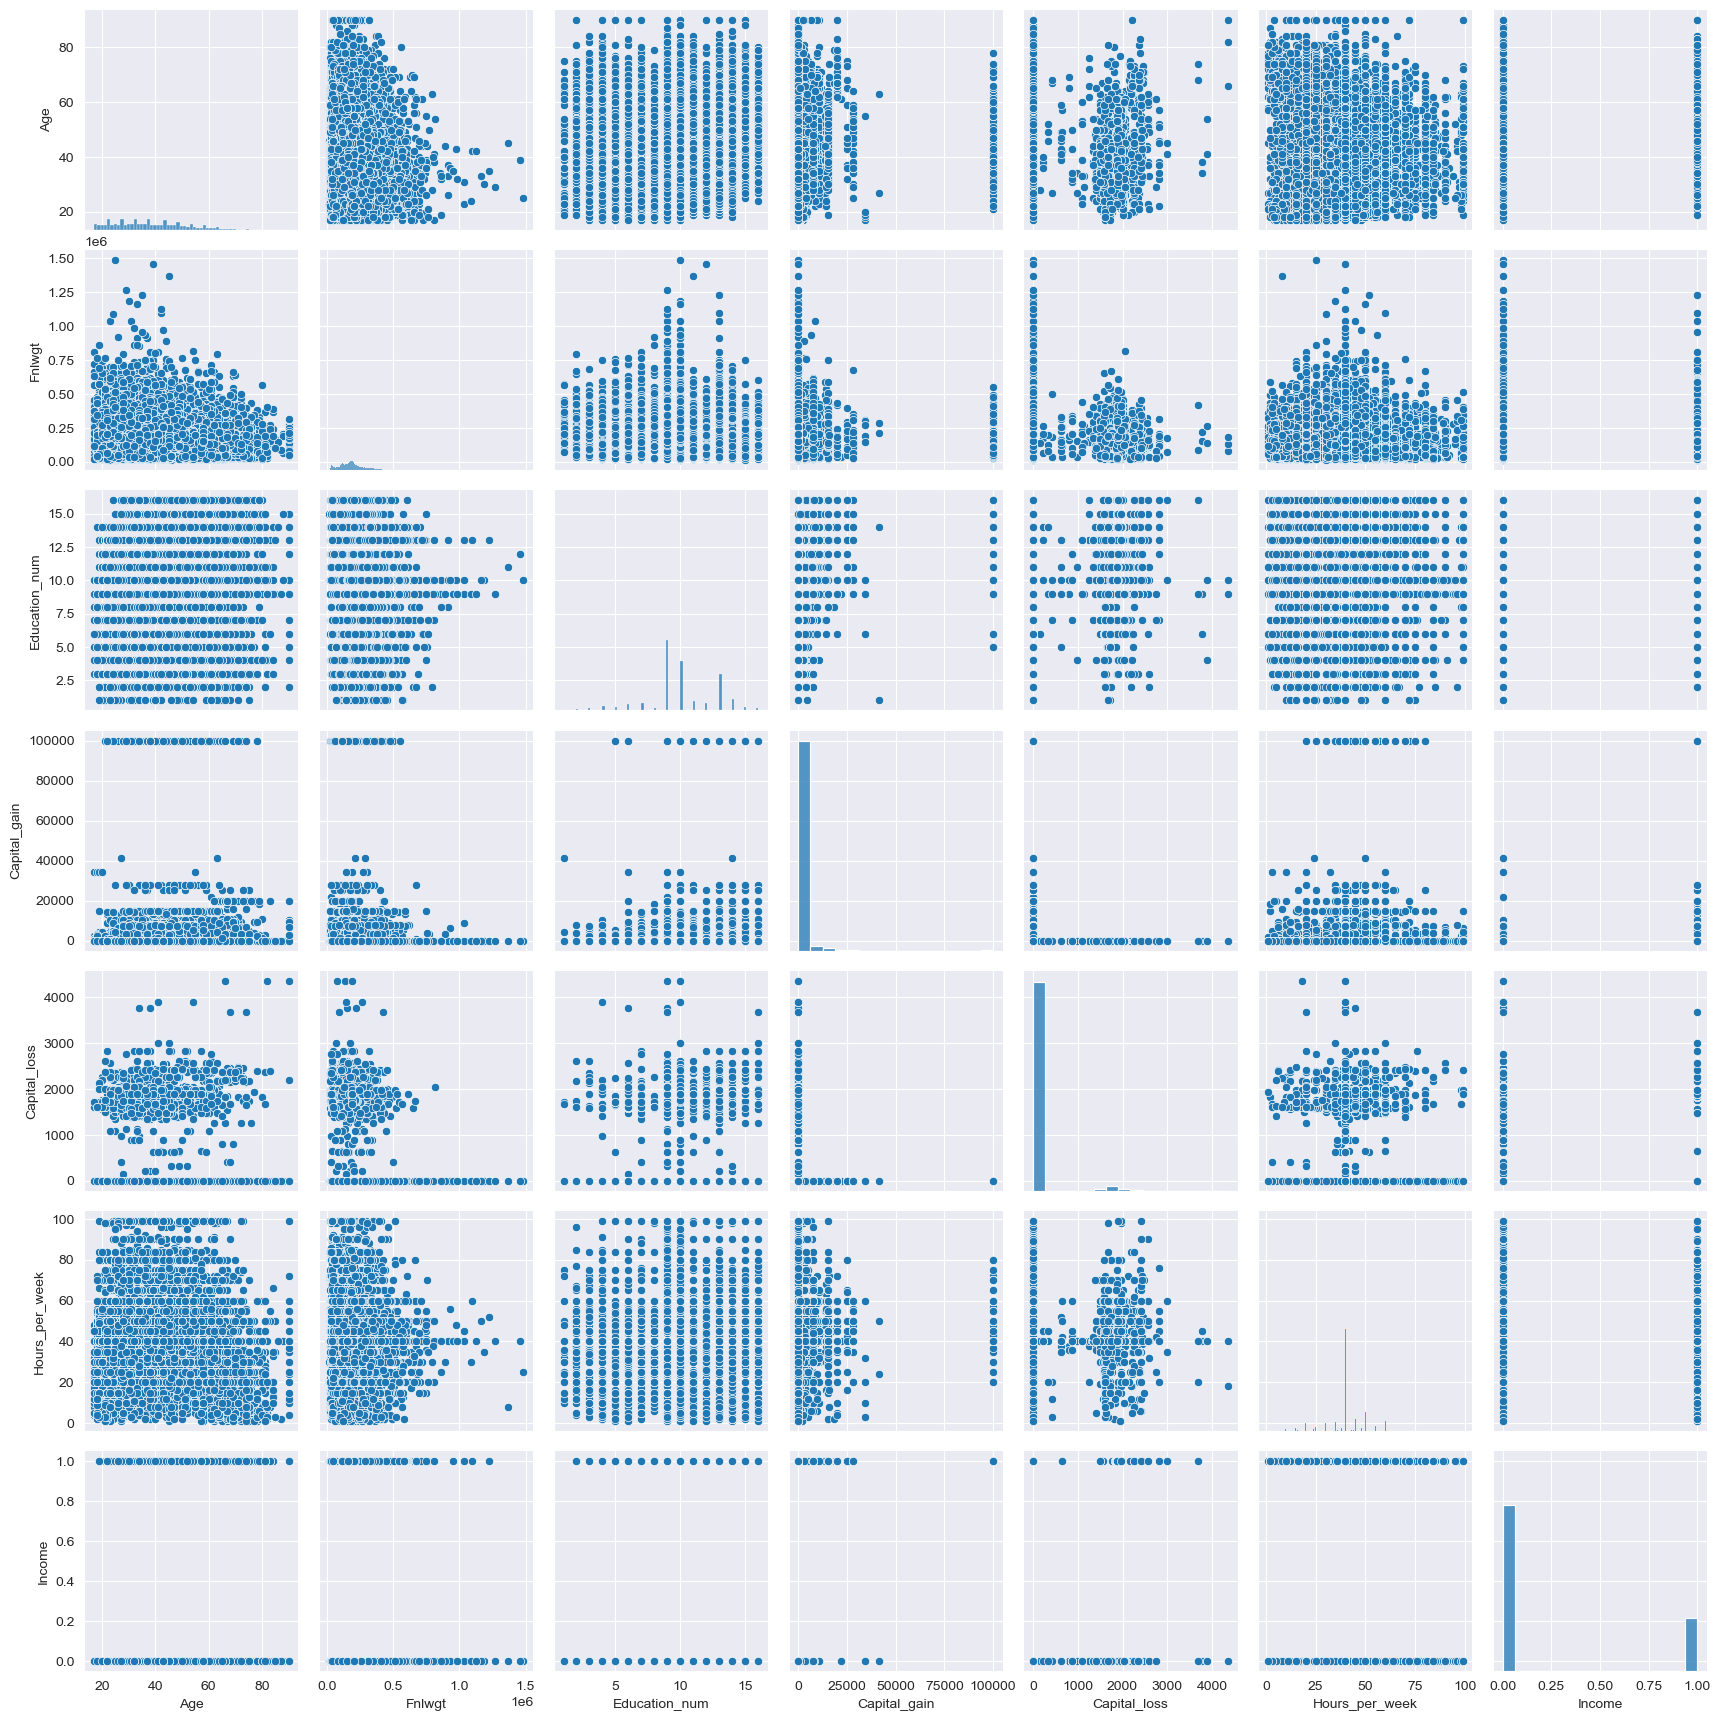

In [74]:
sns.pairplot(df)

Cleaning Data


In [75]:
categorical_col  =['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']

In [76]:
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [77]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,New_occupation
0,50,5,83311,13,2,0,4,1,0,0,13,38,0,0
1,38,3,215646,9,0,1,4,1,0,0,40,38,0,2
2,53,3,234721,7,2,0,2,1,0,0,40,38,0,2
3,28,3,338409,13,2,5,2,0,0,0,40,4,0,0
4,37,3,284582,14,2,5,4,0,0,0,40,38,0,0


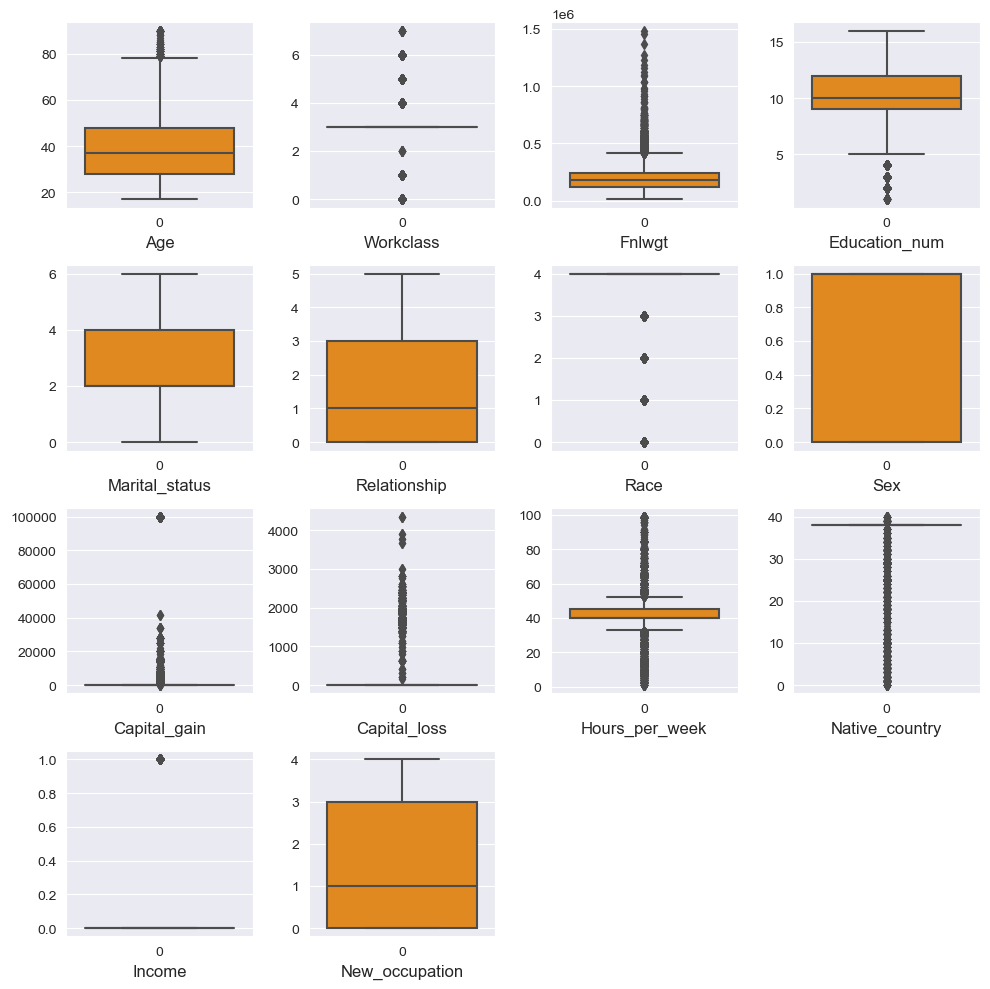

In [78]:
# Handling outliers
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [79]:
df.shape

(32536, 14)

In [80]:
clolumns_to_be_handle = df[['Age','Capital_gain','Capital_loss','Fnlwgt','Native_country','Hours_per_week']]

In [81]:
z=np.abs(zscore(clolumns_to_be_handle))
z

,Age,Capital_gain,Capital_loss,Fnlwgt,Native_country,Hours_per_week
0,0.836961,0.145969,0.216747,1.008703,0.261135,2.222450
1,0.042934,0.145969,0.216747,0.245008,0.261135,0.035664
2,1.056935,0.145969,0.216747,0.425720,0.261135,0.035664
3,0.776180,0.145969,0.216747,1.408036,5.355163,0.035664
4,0.116259,0.145969,0.216747,0.898091,0.261135,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.145969,0.216747,0.639647,0.261135,0.197648
32556,0.103715,0.145969,0.216747,0.335469,0.261135,0.035664
32557,1.423558,0.145969,0.216747,0.358812,0.261135,0.035664
32558,1.216128,0.145969,0.216747,0.110897,0.261135,1.655506


In [82]:
df= df[(z<3).all(axis=1)]
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,New_occupation
0,50,5,83311,13,2,0,4,1,0,0,13,38,0,0
1,38,3,215646,9,0,1,4,1,0,0,40,38,0,2
2,53,3,234721,7,2,0,2,1,0,0,40,38,0,2
4,37,3,284582,14,2,5,4,0,0,0,40,38,0,0
5,49,3,160187,5,3,1,2,0,0,0,16,22,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,5,4,0,0,0,38,38,0,3
32556,40,3,154374,9,2,0,4,1,0,0,40,38,1,3
32557,58,3,151910,9,6,4,4,0,0,0,40,38,0,1
32558,22,3,201490,9,4,3,4,1,0,0,20,38,0,1


In [83]:
# Calculate the percentage of data loss
original_rows = 32537  
new_rows = 28978 

data_loss_percentage = ((original_rows - new_rows) / original_rows) * 100

print(f"Data Loss Percentage: {data_loss_percentage:.2f}%")

Data Loss Percentage: 10.94%


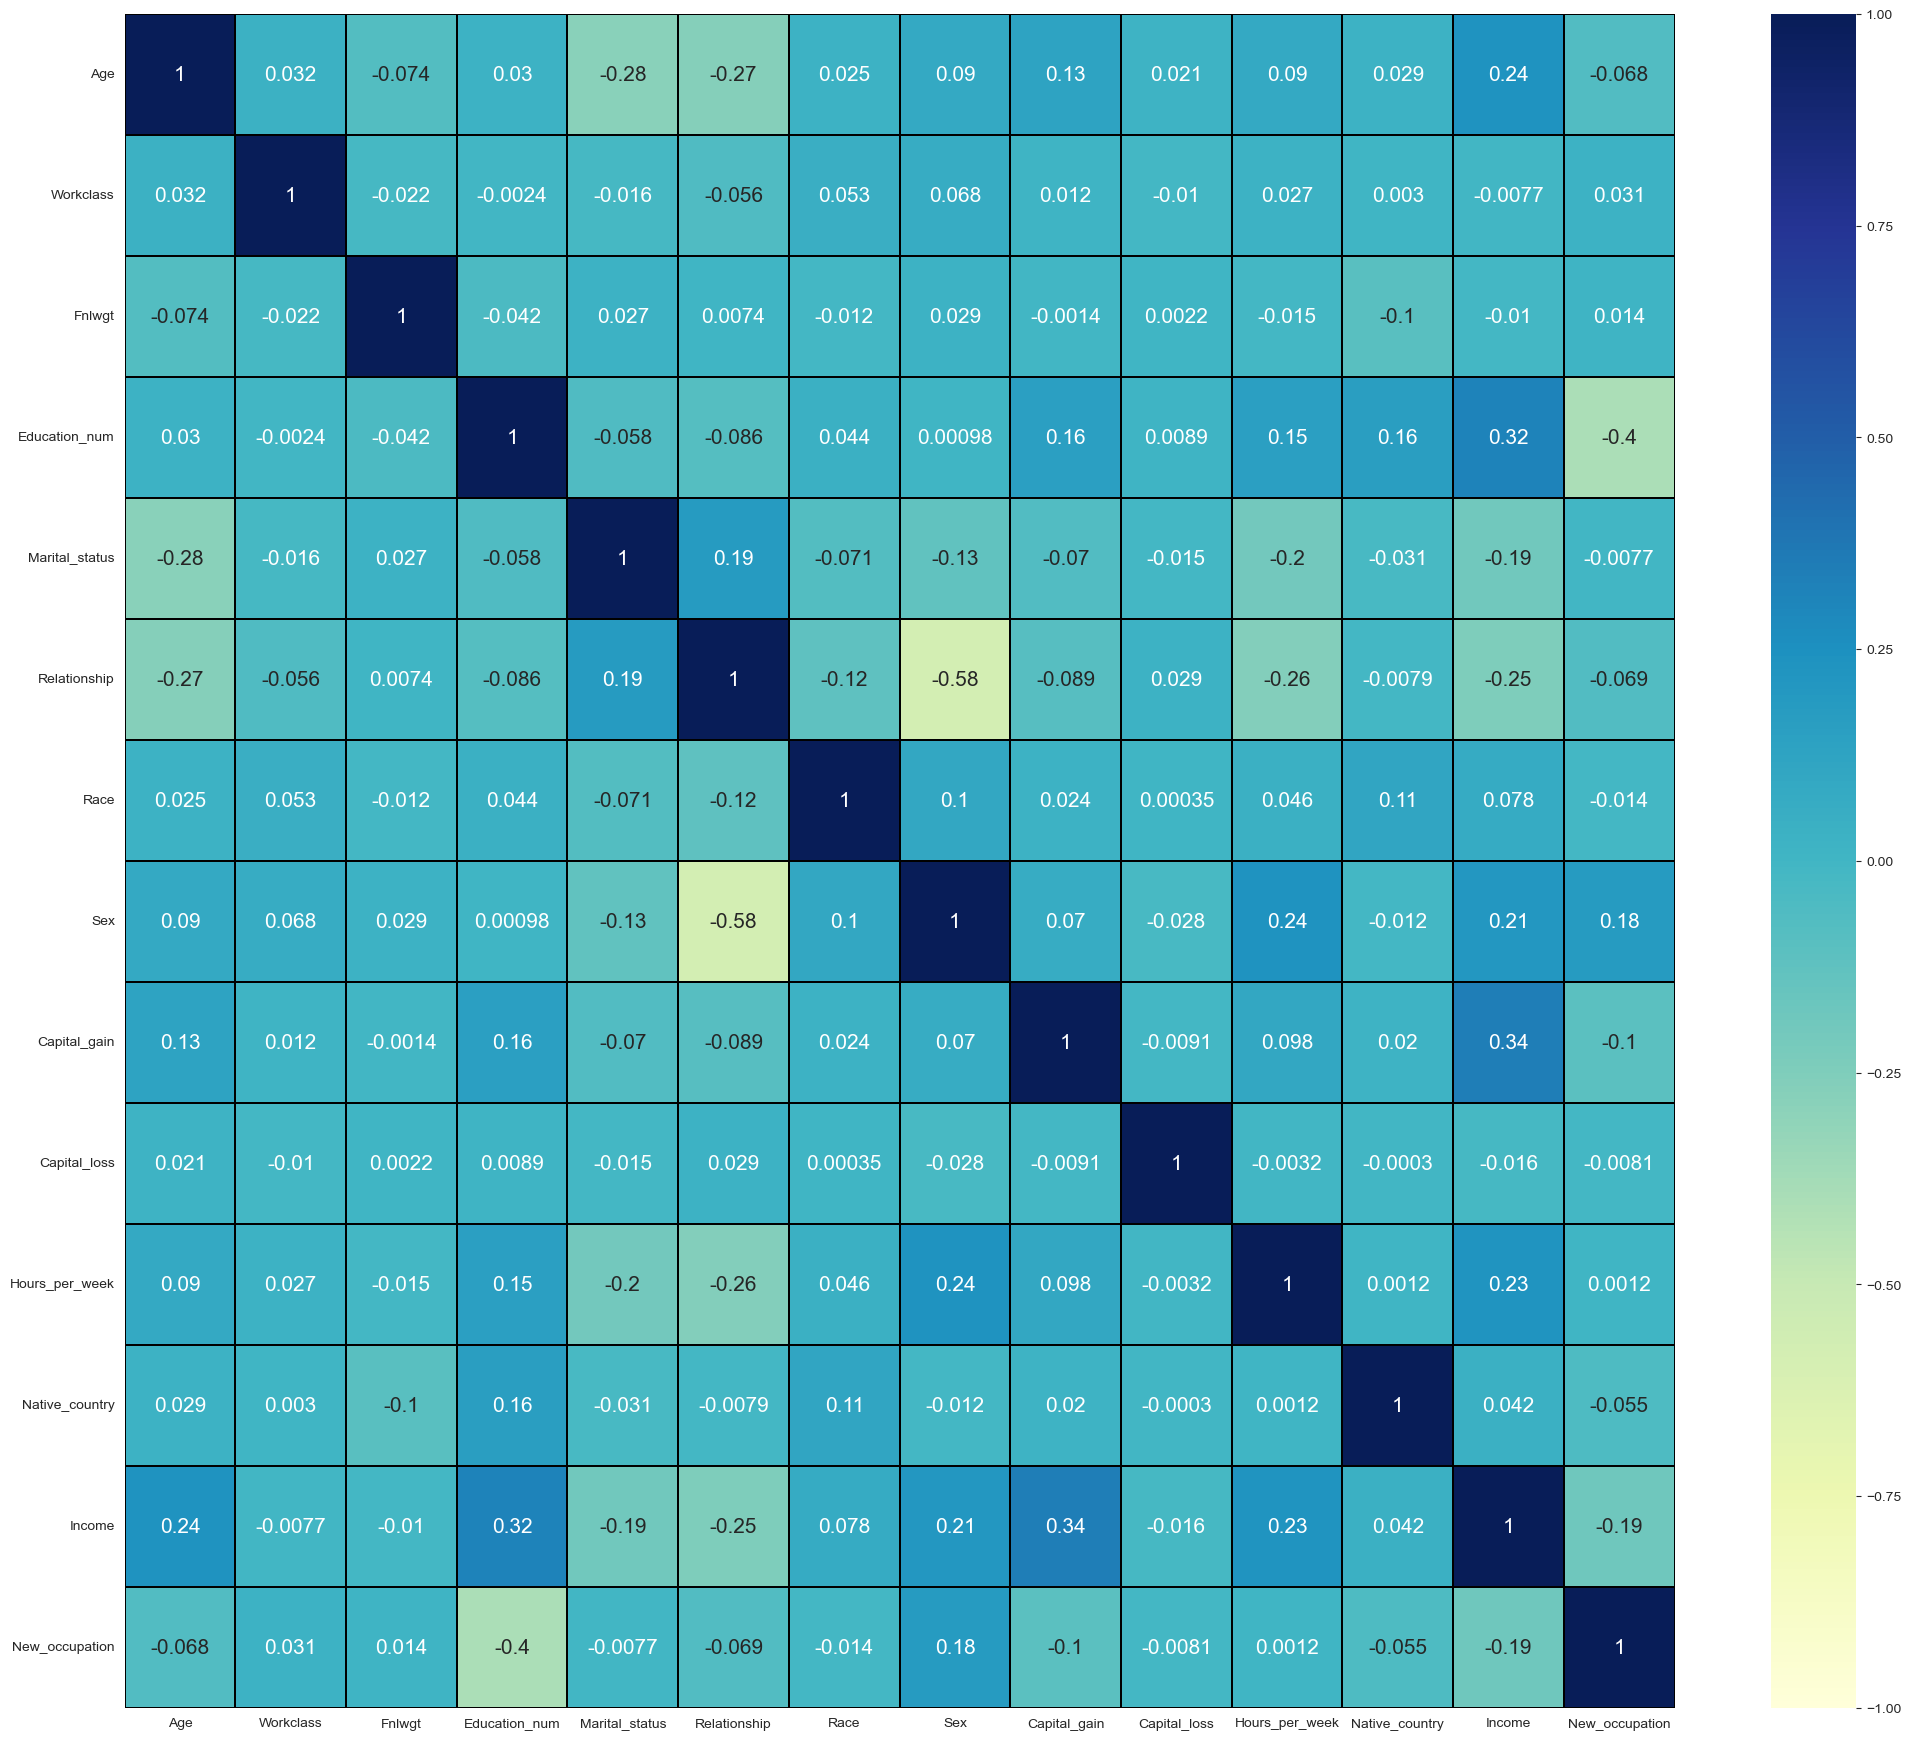

In [84]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

In [85]:
#correlation with target column
correlation_with_quality = df.corr()['Income'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Income            1.000000
Capital_gain      0.343718
Education_num     0.316858
Relationship      0.246035
Age               0.238361
Hours_per_week    0.231655
Sex               0.209232
Marital_status    0.194196
New_occupation    0.186733
Race              0.078008
Native_country    0.042227
Capital_loss      0.016480
Fnlwgt            0.010005
Workclass         0.007700
Name: Income, dtype: float64


<Axes: >

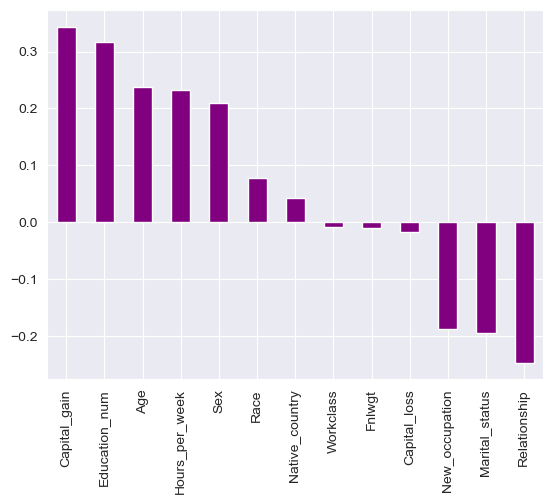

In [86]:
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar', color='purple')

In [87]:
# dropping irrelevant columns
df.drop(columns = ['Fnlwgt','Workclass','Capital_loss'],axis=1,inplace=True)

In [88]:
#schecking correlation
df_corr = df.corr()
df_corr

,Age,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income,New_occupation
Age,1.000000,0.030309,-0.284701,-0.269293,0.024776,0.089709,0.128518,0.090397,0.028679,0.238361,-0.068257
Education_num,0.030309,1.000000,-0.057947,-0.085630,0.043921,0.000975,0.155405,0.152131,0.156662,0.316858,-0.399499
Marital_status,-0.284701,-0.057947,1.000000,0.186136,-0.070661,-0.126020,-0.069570,-0.197142,-0.031211,-0.194196,-0.007667
Relationship,-0.269293,-0.085630,0.186136,1.000000,-0.124417,-0.576109,-0.089028,-0.258632,-0.007884,-0.246035,-0.068512
Race,0.024776,0.043921,-0.070661,-0.124417,1.000000,0.099589,0.023811,0.046377,0.112260,0.078008,-0.013512
Sex,0.089709,0.000975,-0.126020,-0.576109,0.099589,1.000000,0.069799,0.235528,-0.011996,0.209232,0.181455
Capital_gain,0.128518,0.155405,-0.069570,-0.089028,0.023811,0.069799,1.000000,0.097713,0.019824,0.343718,-0.104012
Hours_per_week,0.090397,0.152131,-0.197142,-0.258632,0.046377,0.235528,0.097713,1.000000,0.001225,0.231655,0.001151
Native_country,0.028679,0.156662,-0.031211,-0.007884,0.112260,-0.011996,0.019824,0.001225,1.000000,0.042227,-0.054509
Income,0.238361,0.316858,-0.194196,-0.246035,0.078008,0.209232,0.343718,0.231655,0.042227,1.000000,-0.186733


In [89]:
correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [90]:
features_to_drop

set()

In [91]:
df1=df.copy()

In [92]:
#drop target column
df1.drop('Income',axis=1, inplace=True)

In [93]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [94]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [95]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Age,1.180586
1,Education_num,1.278674
2,Marital_status,1.137177
3,Relationship,1.668703
4,Race,1.033314
5,Sex,1.578248
6,Capital_gain,1.051270
7,Hours_per_week,1.137225
8,Native_country,1.039463
9,New_occupation,1.253498


There is no multicolinearity

# Prediction

In [96]:
# Splitting into Feature and Target column
X= df.drop('Income', axis=1)
Y=df['Income']

In [97]:
X.skew()

Age               0.489286
Education_num    -0.288047
Marital_status   -0.048200
Relationship      0.744802
Race             -2.506352
Sex              -0.684368
Capital_gain      4.942761
Hours_per_week   -0.351600
Native_country   -4.718326
New_occupation    0.153049
dtype: float64

In [98]:
skew = ['Relationship','Race','Capital_gain','Native_country']

In [99]:
transformed=power_transform(X[skew].values)

In [100]:
pd.DataFrame(transformed).skew()

0    0.105835
1   -2.063036
2    3.081105
3    0.031241
dtype: float64

In [101]:
sc=StandardScaler()

In [102]:
X=sc.fit_transform(transformed)

In [103]:
# Data Balancing
sm=SMOTE()

In [104]:
x,y=sm.fit_resample(X,Y)

In [105]:
x.shape , y.shape

((45082, 4), (45082,))

Model Training

In [106]:
# finding best Randomstate
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.757679937895087 on Random State = 170


In [107]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [108]:
# defining all classifiaction model 
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

In [109]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 75.76799378950871
Confusion Matrix of  LogisticRegression()  is 
 [[3121 1315]
 [ 870 3711]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      4436
           1       0.74      0.81      0.77      4581

    accuracy                           0.76      9017
   macro avg       0.76      0.76      0.76      9017
weighted avg       0.76      0.76      0.76      9017

******************************
Accuracy_Score of  RidgeClassifier() is 75.05822335588334
Confusion Matrix of  RidgeClassifier()  is 
 [[3131 1305]
 [ 944 3637]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      4436
           1       0.74      0.79      0.76      4581

    accuracy                           0.75      9017
   macro avg       0.75      0.75      0.75      9017
weighted avg       0.75      0.75      0.75      9017

******************************
Accuracy_Score of 

In [110]:
# Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 75.76799378950871
cross Validation accuracy score of  LogisticRegression()  is  74.6972257568495
**************************************************
Accuracy_Score of  RidgeClassifier() is 75.05822335588334
cross Validation accuracy score of  RidgeClassifier()  is  73.98297571411744
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 80.79183764001331
cross Validation accuracy score of  DecisionTreeClassifier()  is  79.9698341661452
**************************************************
Accuracy_Score of  SVC() is 78.26328047022291
cross Validation accuracy score of  SVC()  is  77.36125733714655
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 64.24531440612176
cross Validation accuracy score of  KNeighborsClassifier()  is  67.11576103070223
**************************************************
Accuracy_Score of  RandomForestClassifier() is 80.84728845514029
c

RandomForestClassifier gave best accuracy score and minimum difference for generalise model

Hyperparameter tuning on RandomForestClassifier

In [111]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [112]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [113]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, min_samples_split=3, n_estimators=600)

In [114]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 600}

In [121]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8084728845514029

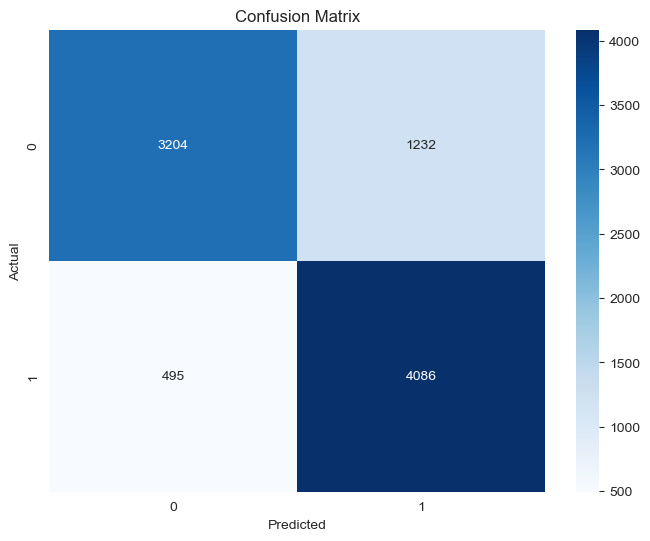

In [124]:
# Confusion matrix
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [123]:
# saving Model
joblib.dump(grid_search.best_estimator_,"Census_Income.pkl")

['Census_Income.pkl']